In [11]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [294]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from random import random

In [277]:
df = pd.read_csv('data.csv')

In [281]:
df.columns = ['X','y']

In [282]:
X=df['X']
y=df['y']

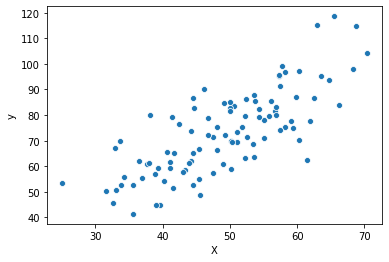

In [298]:
sb.scatterplot(X,y)

In [152]:
def cost_function(y_true, y_predict):
    """
    Function to compute loss/cost.
    """
    cost = 0
    for i in range(0,len(y_true)):
        cost += ( (y_true[i] - y_predict[i]) ** 2 )
    return cost/float(len(y_true))

In [413]:
def get_y_predict(x, w, b):
    """
    Function to compute prediction based on w and b.
    y = mx + b
    """
    y_predict = []
    for i in range(0,len(x)):
        y_predict.append(x[i] * w + b)
    return y_predict

In [257]:
def gradecent_descent_step(x, y, w, b):
    """
    Function to compute one step of gradient decent.
    df/dw = -2/N * (x * (y_true - y_pretdict))
    df/db = -2/N *  (y_true - y_predict)
    """
    w_new = 0
    b_new = 0
    N = len(x)
    for i in range(0,N):
        y_predict = x[i] * w + b
        w_new+=(-2/N) * (x[i] * ( y[i] - y_predict))
        b_new+=(-2/N) * (y[i] - y_predict)
    return w_new,b_new

In [287]:
def run_gradient_descent (w,b, learning_rate,iterations):
    """
    Function to adjust w and b based on learning rate and take next step.
    """
    for i in range(0,iterations):
        w_new,b_new = gradecent_descent_step(X,y,w,b)
        w = w - (learning_rate * w_new)
        b = b - (learning_rate * b_new)
    return w, b

In [401]:
def run_rr(X,y,iterations,ax):
    """
    Function orchestrates entire algorithm for a iteration.
    """
    w = 0
    b = 0
    w,b = run_gradient_descent(w,b,0.00001,iterations)
    y_predict = get_y_predict(X,w,b)
    cost = cost_function(y,y_predict)
    #print("Cost function at initialization is {0}, w = {1}, b = {2} ".format(cost,w,b))
    fig =sb.scatterplot(X,y,ax=ax)
    _=ax.plot([min(X), max(X)], [min(y_predict), max(y_predict)], color='red')  # regression line
    fig.set(title="Iterations {0}, w = {1:1.2f}, b={2:1.2f}, cost={3:4.2f}".format(iterations,w,b,cost))
    #return plt,w,b

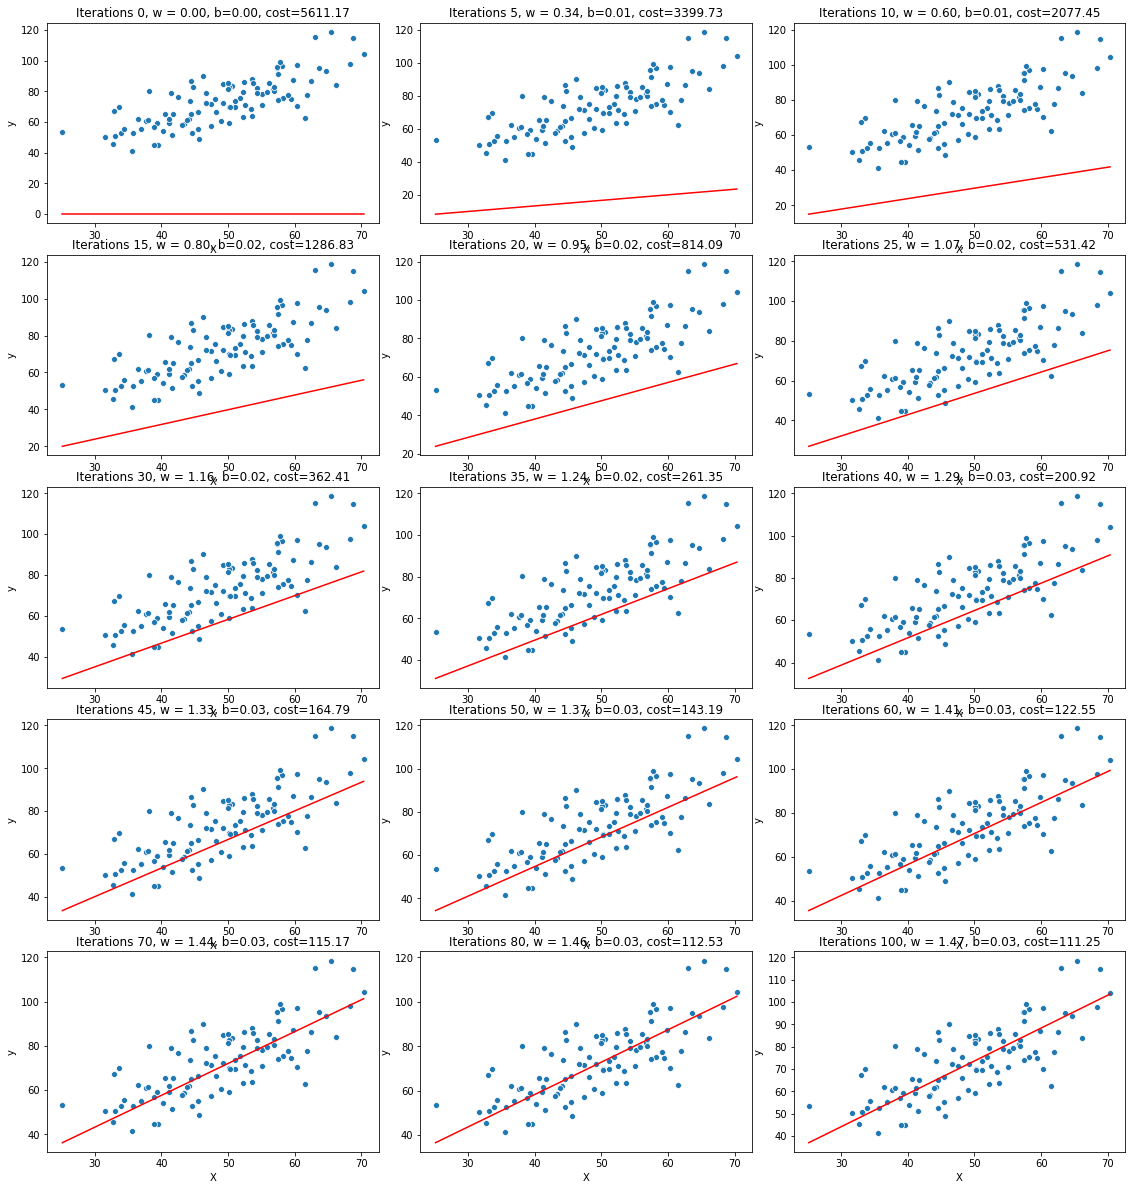

In [412]:
if __name__ == '__main__':
    w = 0
    b = 0
    rows,cols = 5,3
    a4_dims = (15.7, 16.27)
    fig, ax = plt.subplots(nrows=rows, ncols=cols,figsize=a4_dims)
    fig.tight_layout()
    i = 0
    iterations  = [0,5,10,15,20,25,30,35,40,45,50,60,70,80,100]
    for row in ax:
        for col in row:
            if i >= len(iterations):
                break
            run_rr(X,y,iterations[i],col)
            i+=1
    